# 🔎 E-Commerce Platform – Chi-Square Test

## 📌 Problem Statement
The company wants to test if there is a significant association between **User Type** (Paid vs Free) and **App Preference** (Mobile App vs Web App).

## 🧠 5W1H Analysis

- **What**: Relationship between User Type (Paid vs Free) and App Preference (Mobile App vs Web App)
- **Why**: To optimize marketing strategies for paid users and free users
- **When**: Data collected from 50,000 users over the last quarter
- **Where**: Across the entire platform (mobile + web users)
- **Who**: A random sample of users from different countries
- **How**: Perform a Chi-Square Test for Independence to check for any association


In [2]:
import pandas as pd
import numpy as np

# Simulate dataset
np.random.seed(42)
n_users = 5000  # 5,000 users for better sample size

data = pd.DataFrame({
    'User_ID': np.arange(1, n_users + 1),
    'User_Type': np.random.choice(['Paid', 'Free'], n_users),
    'App': np.random.choice(['Mobile', 'Web'], n_users)
})

data.head()

,User_ID,User_Type,App
0,1,Paid,Mobile
1,2,Free,Mobile
2,3,Paid,Mobile
3,4,Paid,Mobile
4,5,Paid,Web


User_ID      0
User_Type    0
App          0
dtype: int64


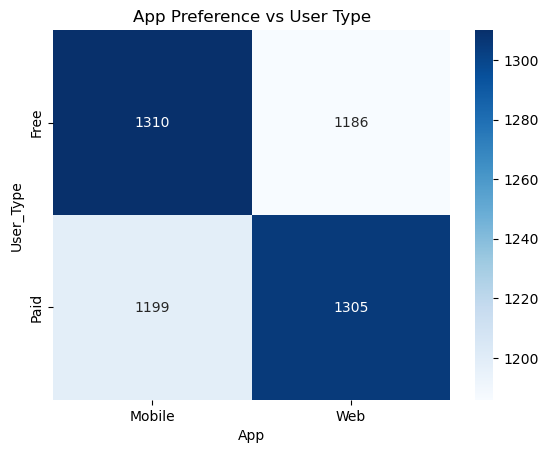

In [4]:
# 🔍 Check for null values
print(data.isnull().sum())

# 🧪 Visualize the relationship between User Type and App Preference
import seaborn as sns
import matplotlib.pyplot as plt

# Crosstab (Contingency Table)
crosstab = pd.crosstab(data['User_Type'], data['App'])

# Plotting a heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title("App Preference vs User Type")
plt.show()


In [6]:
from scipy.stats import chi2_contingency

# Perform Chi-Square Test for Independence
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")


Chi-Square Statistic: 10.3996
P-Value: 0.0013
Degrees of Freedom: 1
Expected Frequencies: 
[[1252.4928 1243.5072]
 [1256.5072 1247.4928]]


## ✅ Interpretation + Business Impact

- 📊 If **p < 0.05**, we reject the null hypothesis and conclude that there **is an association** between **User Type** (Paid/Free) and **App Preference** (Mobile/Web).
- 🎯 If **p ≥ 0.05**, we fail to reject the null hypothesis, indicating that **User Type** has **no significant impact** on **App Preference**.

### 💼 Business Impact

- **If significant**: The company could tailor its marketing strategies — for example, focusing more on mobile app promotions for paid users.
- **If not significant**: The marketing team can focus on optimizing both platforms without any specific user type differentiation.
